# Import Library

In [2]:
#import library yang akan digunakan
import matplotlib.pyplot as plt
import pickle, gzip
import numpy as np
import urllib.request

#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Import Dataset dari DropBox

In [3]:
#Download dataset dari dropbox
url = "https://www.dropbox.com/s/d3hz2dli4z6imfl/mnist_1000.pkl.gz?dl=1"
u = urllib.request.urlopen(url) # Respon HTTP
data = u.read() # Data mnist berbentuk byte
u.close()
 
with open('mnist_1000.pkl.gz', "wb") as f :
    f.write(data)

In [4]:
# load dataset
f = gzip.open('/content/mnist_1000.pkl.gz', 'rb')
trainData, trainLabels, valData, valLabels, testData, testLabels = pickle.load(
    f, encoding='latin1')
f.close()

# Data Exploration

In [5]:
# Melihat jumlah data dalam dataset

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1000
validation data points: 200
testing data points: 200


In [6]:
#Lihat label data

print('Label datanya : ', np.unique(trainLabels))
print('Ukuran matriks tiap datanya : ', trainData[0].shape) # ukuran datanya sudah dalam bentuk vektor (ukuran panjang dan lebarnya 28 x28)

Label datanya :  [0 1 2 3 4 5 6 7 8 9]
Ukuran matriks tiap datanya :  (784,)


label =  5


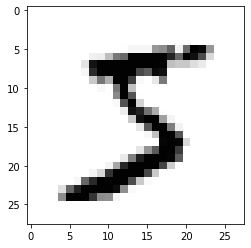

label =  0


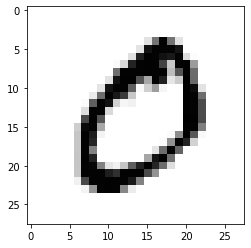

label =  4


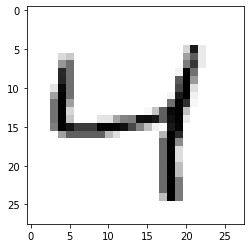

label =  1


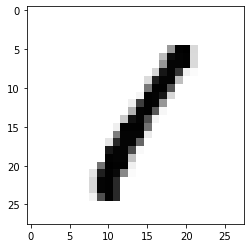

label =  9


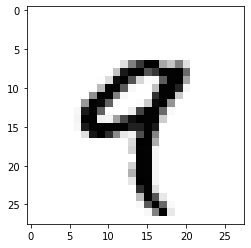

label =  2


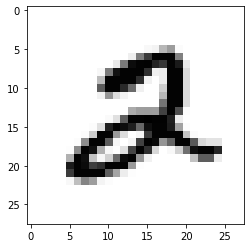

label =  1


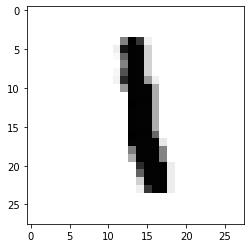

label =  3


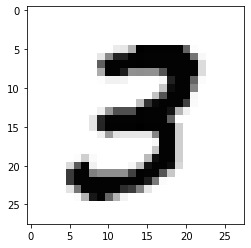

label =  1


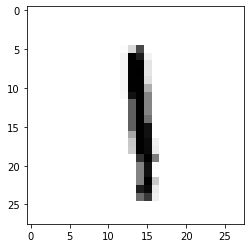

label =  4


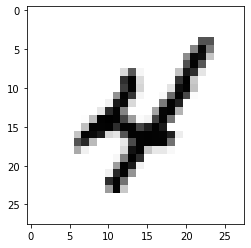

label =  3


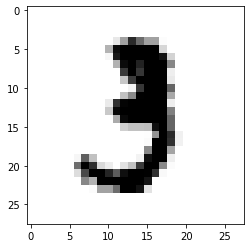

label =  5


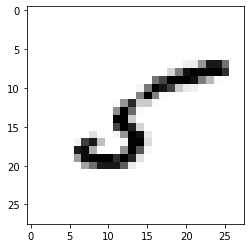

label =  3


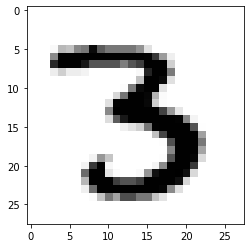

label =  6


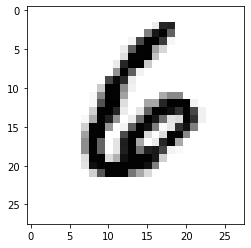

label =  1


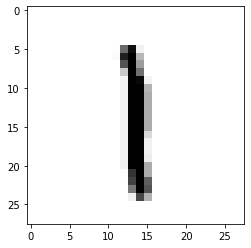

In [7]:
# Visualisasikan 10 data training pertama:

for i in range(15):
  image = trainData[i].reshape((28,28))
  print('label = ', trainLabels[i])
  plt.imshow(image, cmap="Greys") # cmap bisa diganti, coba ganti gray, Blues, Orange, Inferno
  plt.show()

# Membangun Model CV menggunakan k-NN

Referensi: [Precision, Recall, F1-Scores](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) 

Referensi: [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [14]:
# Melatih model untuk menentukan k Optimal
 
for k in range (1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
 
    score = model.score(valData, valLabels)
    scores = cross_val_score(model, valData, valLabels, cv = 5)
    print("k = %d | akurasi = %0.2f | akurasi cv: %0.2f" %(k, score, scores.mean())) 

k = 1 | akurasi = 0.88 | akurasi cv: 0.85
k = 2 | akurasi = 0.84 | akurasi cv: 0.81
k = 3 | akurasi = 0.88 | akurasi cv: 0.82
k = 4 | akurasi = 0.88 | akurasi cv: 0.80
k = 5 | akurasi = 0.86 | akurasi cv: 0.80
k = 6 | akurasi = 0.85 | akurasi cv: 0.81
k = 7 | akurasi = 0.84 | akurasi cv: 0.77
k = 8 | akurasi = 0.85 | akurasi cv: 0.77
k = 9 | akurasi = 0.85 | akurasi cv: 0.74
k = 10 | akurasi = 0.83 | akurasi cv: 0.74
k = 11 | akurasi = 0.83 | akurasi cv: 0.74
k = 12 | akurasi = 0.81 | akurasi cv: 0.72
k = 13 | akurasi = 0.81 | akurasi cv: 0.73
k = 14 | akurasi = 0.81 | akurasi cv: 0.69
k = 15 | akurasi = 0.81 | akurasi cv: 0.70
k = 16 | akurasi = 0.81 | akurasi cv: 0.68
k = 17 | akurasi = 0.80 | akurasi cv: 0.68
k = 18 | akurasi = 0.81 | akurasi cv: 0.66
k = 19 | akurasi = 0.81 | akurasi cv: 0.64


In [13]:
# melatih ulang classifier menggunakan nilai k terbaik value dan memprediksikan label

model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=3)

# Evaluation

In [12]:
test_accuracy = model.score(testData, testLabels)
print(f"Achieved accuracy of {test_accuracy*100}% on test data")

Achieved accuracy of 81.0% on test data


In [11]:
predictions = model.predict(testData)
print("Classification Report")
print(classification_report(testLabels, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.67      1.00      0.80        28
           2       1.00      0.56      0.72        16
           3       0.85      0.69      0.76        16
           4       0.81      0.75      0.78        28
           5       1.00      0.75      0.86        20
           6       1.00      0.80      0.89        20
           7       0.79      0.79      0.79        24
           8       1.00      0.80      0.89        10
           9       0.64      0.86      0.73        21

    accuracy                           0.81       200
   macro avg       0.86      0.80      0.82       200
weighted avg       0.84      0.81      0.81       200



Skor F1 mungkin merupakan ukuran yang lebih baik untuk digunakan jika kita perlu mencari keseimbangan antara nilai Precision dan Recall. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


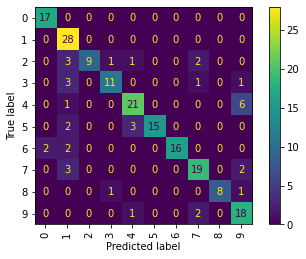

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, testData, testLabels, xticks_rotation='vertical', values_format='d')

In [9]:
import pickle
filename = 'knn_model.sav'
pickle.dump(model, open(filename, 'wb'))